In [138]:
import cv2
from matplotlib import pyplot as plt
import numpy as np 
import random
import math
import numpy as np
import statistics 
import scipy.io
from scipy.stats import norm
from scipy.stats import norm
from prettytable import PrettyTable
mat = scipy.io.loadmat('a1digits.mat')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

test_data = np.array(mat['digits_test']) 
training_data = np.array(mat['digits_train'])    


Examine the data and look at some of the pictures to get an idea of what the images look like.

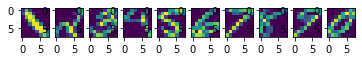

In [116]:
imgs = []
for i in range(0,10):
        temp = training_data[:,0,i] 
        temp = temp.reshape(8,8)
        imgs.append(temp)

counter = 0 
f, axarr = plt.subplots(1,10)
for img in imgs: 
    axarr[counter].imshow(img)
    counter +=1

GUASSIAN TRAINING

In [117]:
# fit a probability distribution to a univariate data sample
def train_distribution(data):
        mu = np.sum(data)/700
        return mu
        
        
 

In [118]:
def calc_mu_sigma(data): 
    mu = [[] for i in range(data.shape[2])]
    sigma = 0.0
    for Class in range(0,data.shape[2]):
        for feature in range (data.shape[0]):
            mu[Class].append(train_distribution(data[feature,:,Class]))

    for Class in range(0,data.shape[2]):
        for feature in range(0,data.shape[0]):
            for column in range(0,data.shape[1]): 
               sigma += (data[feature,column,Class] - mu[Class][feature])**2

    sigma = sigma/(700*10*64)
    
    return [mu,sigma]
    

In [119]:
def plot_data(data): 
    imgs = []
    mu,sigma_sqrd = calc_mu_sigma(data)
    for i in range(0,data.shape[2]):
            temp = np.array(mu[:][i]).reshape(8,8)
            imgs.append(temp)
    counter = 0 
    f, axarr = plt.subplots(1,10)
    plt.title("Sigma = " + str(math.sqrt(sigma_sqrd)),loc = "center")
    for img in imgs: 
        axarr[counter].imshow(img,"gray")
        counter +=1

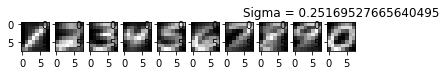

In [120]:
plot_data(training_data)

NAIVES BAYES TRAINING

In [121]:
def binary_thresh(data): 
    thresh_data = data.copy()
    for i in range(data.shape[0]): 
        for j in range(data.shape[1]): 
            for k in range(data.shape[2]): 
                if data[i,j,k] < .5: 
                    thresh_data[i,j,k] = 0
                else: 
                    thresh_data[i,j,k] = 1
    return thresh_data

In [122]:
def train_and_plot_naives(data): 
    binary_data = binary_thresh(data)
    imgs = []
    mu,_ = calc_mu_sigma(binary_data)
    for i in range(0,data.shape[2]):
            temp = np.array(mu[:][i]).reshape(8,8)
            imgs.append(temp)
    counter = 0 
    f, axarr = plt.subplots(1,10)
    plt.title("ETA per Class",loc = "center")
    for img in imgs: 
        axarr[counter].imshow(img,"gray")
        counter +=1
    

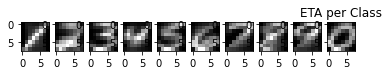

In [123]:
train_and_plot_naives(training_data)

TEST GUASSIAN

In [141]:
def test_guassian(test_data, training_data):
    mu,sigma = calc_mu_sigma(training_data)
    accuracy_per_class = [[] for i in range(test_data.shape[2])]
    counter = 0
    for cl in range(10):
        count_False = 0
        count_True = 0 
        while counter < 400:
            sample_probs_guassian = []
            for Class in range(10):
                      sample_probs_guassian.append(((((2*math.pi*sigma)**-10)*math.exp((-1/(2*sigma))*(np.sum((test_data[i,counter,cl] - mu[Class][i])**2 for i in range(64)))))*.1))
            counter += 1
            sample_check = max(sample_probs_guassian)
            max_index = sample_probs_guassian.index(sample_check)
            if cl == max_index:
                count_True += 1
            else: 
                count_False += 1
            sample_probs_guassian = []
        counter = 0 
        accuracy_per_class[cl].append((count_False/400)*100)
        print("The accuracy of testing class " + str(cl) + " data is: " + str((count_True/400)*100)+ "\n")
        
    return accuracy_per_class

TEST NAIVES

In [155]:
def test_naives(test_data,training_data):
    binary_data = binary_thresh(training_data)
    mu,_ = calc_mu_sigma(binary_data)
    binary_data = binary_thresh(test_data)
    accuracy_per_class = [[] for i in range(test_data.shape[2])]
    counter = 0
    for cl in range(10):
        count_False = 0
        count_True = 0 
        while counter < 400:
            sample_probs_naives = []
            for Class in range(10):
                      sample_probs_naives.append(np.prod([mu[Class][i] if binary_data[i,counter,cl] == 1 else 1 - mu[Class][i] for i in range(64)]))
            counter += 1
            sample_check = max(sample_probs_naives)
            max_index = sample_probs_naives.index(sample_check)
            if cl == max_index:
                count_True += 1
            else: 
                count_False += 1
            sample_probs_naives = []
        counter = 0 
        print("The accuracy of testing Naives for each class is: " + str((count_True/400)*100) + "\n")
        accuracy_per_class[cl].append((count_False/400)*100)
    return accuracy_per_class

In [163]:
test1 = test_guassian(test_data,training_data)
test2 = test_naives(test_data,training_data)

t = PrettyTable(['Guassian', 'Naives Bayes'])
for i in range(10):  
    t.add_row([test1[i], test2[i]])
print(t)
avg1, avg2 = np.sum(test1)/10 , np.sum(test2)/10
print("The Guassian and Naives Average Error is : " +  str(avg1)+ "%" + " | " + str(avg2) + "%")


The accuracy of testing class 0 data is: 82.75

The accuracy of testing class 1 data is: 79.75

The accuracy of testing class 2 data is: 84.25

The accuracy of testing class 3 data is: 84.75

The accuracy of testing class 4 data is: 83.0

The accuracy of testing class 5 data is: 89.0

The accuracy of testing class 6 data is: 84.25

The accuracy of testing class 7 data is: 72.75

The accuracy of testing class 8 data is: 72.5

The accuracy of testing class 9 data is: 86.75

The accuracy of testing Naives for each class is: 78.25

The accuracy of testing Naives for each class is: 73.5

The accuracy of testing Naives for each class is: 78.75

The accuracy of testing Naives for each class is: 78.75

The accuracy of testing Naives for each class is: 71.25

The accuracy of testing Naives for each class is: 85.25

The accuracy of testing Naives for each class is: 77.25

The accuracy of testing Naives for each class is: 70.0

The accuracy of testing Naives for each class is: 68.5

The accuracy 

In [136]:
for i in range(10):
    sample_check = max(result[i])
    max_index = result[i].index(sample_check)
    print("This sample image belongs to class: " + str(max_index + 1))
    
    temp = np.transpose(test_data[:,:,0])[0] 
    temp = temp.reshape(8,8)
    plt.imshow(temp)
    
f, axarr = plt.subplots(1,10)
for img in imgs: 
    axarr[counter].imshow(img)
    counter +=1

temp = np.transpose(test_data[:,:,0])[0] 
temp = temp.reshape(8,8)
plt.imshow(temp)


NameError: name 'result' is not defined